# pandas入门

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 创建对象

创建DataFrame对象

In [2]:
s = pd.Series([1,2,3,45])

In [3]:
s

0     1
1     2
2     3
3    45
dtype: int64

通过时间索引，自定义标签列名

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

使用numpy的array数据来创建DataFrame对象

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,0.451273,-1.169363,-0.691333,0.302975
2013-01-02,0.453267,-2.046363,0.397219,0.811625
2013-01-03,-1.710488,0.888746,-0.131463,-1.054033
2013-01-04,-0.840694,-0.225380,-0.411142,-1.875360
2013-01-05,-0.372986,0.693571,1.533376,0.016596
2013-01-06,1.758689,1.490441,-0.317573,-0.900116


通过字典创建DataFrame对象

In [8]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
# 自动对齐最长的那一列

查看创建的数据类型

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

观察数据的头部和尾部

## 数据视图

In [11]:
print(df.head(5))
print(df.tail(5))

                   A         B         C         D
2013-01-01  0.451273 -1.169363 -0.691333  0.302975
2013-01-02  0.453267 -2.046363  0.397219  0.811625
2013-01-03 -1.710488  0.888746 -0.131463 -1.054033
2013-01-04 -0.840694 -0.225380 -0.411142 -1.875360
2013-01-05 -0.372986  0.693571  1.533376  0.016596
                   A         B         C         D
2013-01-02  0.453267 -2.046363  0.397219  0.811625
2013-01-03 -1.710488  0.888746 -0.131463 -1.054033
2013-01-04 -0.840694 -0.225380 -0.411142 -1.875360
2013-01-05 -0.372986  0.693571  1.533376  0.016596
2013-01-06  1.758689  1.490441 -0.317573 -0.900116


查看DataFrame对象的索引，列名，数据信息

In [12]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.043490,-0.061391,0.063181,-0.449719
std,1.205188,1.347258,0.806249,0.997546
min,-1.710488,-2.046363,-0.691333,-1.875360
25%,-0.723767,-0.933367,-0.387749,-1.015554
50%,0.039143,0.234095,-0.224518,-0.441760
75%,0.452768,0.839952,0.265049,0.231380
max,1.758689,1.490441,1.533376,0.811625


In [15]:
df.values

array([[ 0.45127323, -1.16936256, -0.69133335,  0.30297467],
       [ 0.45326658, -2.0463635 ,  0.39721928,  0.81162536],
       [-1.71048782,  0.88874601, -0.13146251, -1.05403319],
       [-0.84069353, -0.22538033, -0.41114163, -1.87536024],
       [-0.37298642,  0.69357125,  1.53337588,  0.01659583],
       [ 1.75868886,  1.49044104, -0.317573  , -0.90011607]])

简单统计

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.043490,-0.061391,0.063181,-0.449719
std,1.205188,1.347258,0.806249,0.997546
min,-1.710488,-2.046363,-0.691333,-1.875360
25%,-0.723767,-0.933367,-0.387749,-1.015554
50%,0.039143,0.234095,-0.224518,-0.441760
75%,0.452768,0.839952,0.265049,0.231380
max,1.758689,1.490441,1.533376,0.811625


转置数据

In [17]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.451273,0.453267,-1.710488,-0.840694,-0.372986,1.758689
B,-1.169363,-2.046363,0.888746,-0.225380,0.693571,1.490441
C,-0.691333,0.397219,-0.131463,-0.411142,1.533376,-0.317573
D,0.302975,0.811625,-1.054033,-1.875360,0.016596,-0.900116


根据列名排序

In [18]:
df.sort_index(axis=1,ascending=False) # ascending=True代表升序

,D,C,B,A
2013-01-01,0.302975,-0.691333,-1.169363,0.451273
2013-01-02,0.811625,0.397219,-2.046363,0.453267
2013-01-03,-1.054033,-0.131463,0.888746,-1.710488
2013-01-04,-1.875360,-0.411142,-0.225380,-0.840694
2013-01-05,0.016596,1.533376,0.693571,-0.372986
2013-01-06,-0.900116,-0.317573,1.490441,1.758689


根据B列数值排序

In [19]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,0.453267,-2.046363,0.397219,0.811625
2013-01-01,0.451273,-1.169363,-0.691333,0.302975
2013-01-04,-0.840694,-0.225380,-0.411142,-1.875360
2013-01-05,-0.372986,0.693571,1.533376,0.016596
2013-01-03,-1.710488,0.888746,-0.131463,-1.054033
2013-01-06,1.758689,1.490441,-0.317573,-0.900116


## 数据选取

选取单列数据

In [20]:
df['A']

2013-01-01    0.451273
2013-01-02    0.453267
2013-01-03   -1.710488
2013-01-04   -0.840694
2013-01-05   -0.372986
2013-01-06    1.758689
Freq: D, Name: A, dtype: float64

按行选取数据

In [21]:
df[0:3] # 选择前三行

,A,B,C,D
2013-01-01,0.451273,-1.169363,-0.691333,0.302975
2013-01-02,0.453267,-2.046363,0.397219,0.811625
2013-01-03,-1.710488,0.888746,-0.131463,-1.054033


In [22]:
df['20130102':'20130104'] # 按照列名进行选取

,A,B,C,D
2013-01-02,0.453267,-2.046363,0.397219,0.811625
2013-01-03,-1.710488,0.888746,-0.131463,-1.054033
2013-01-04,-0.840694,-0.225380,-0.411142,-1.875360


In [23]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

### 通过标签选取数据

In [24]:
df.loc[dates[0]]

A    0.451273
B   -1.169363
C   -0.691333
D    0.302975
Name: 2013-01-01 00:00:00, dtype: float64

假设df为2维数据，那么df.loc[]，第一个维度或者第二个维度都可以按照名称进行选取，即参数为一个名称列表，如：[A,B]

In [25]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.451273,-1.169363
2013-01-02,0.453267,-2.046363
2013-01-03,-1.710488,0.888746
2013-01-04,-0.840694,-0.225380
2013-01-05,-0.372986,0.693571
2013-01-06,1.758689,1.490441


In [26]:
df.loc['20130102':'20130104','A':'B']

,A,B
2013-01-02,0.453267,-2.046363
2013-01-03,-1.710488,0.888746
2013-01-04,-0.840694,-0.225380


In [27]:
df.loc['20130102',['A','B']]

A    0.453267
B   -2.046363
Name: 2013-01-02 00:00:00, dtype: float64

In [28]:
df.loc[dates[0],'A']

0.4512732321268822

In [29]:
df.at[dates[0],'A']

0.4512732321268822

### 通过index选取数据

In [30]:
df.iloc[3]

A   -0.840694
B   -0.225380
C   -0.411142
D   -1.875360
Name: 2013-01-04 00:00:00, dtype: float64

In [31]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.840694,-0.225380
2013-01-05,-0.372986,0.693571


In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.453267,0.397219
2013-01-03,-1.710488,-0.131463
2013-01-05,-0.372986,1.533376


In [33]:
df.iloc[1:3]

,A,B,C,D
2013-01-02,0.453267,-2.046363,0.397219,0.811625
2013-01-03,-1.710488,0.888746,-0.131463,-1.054033


In [34]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.169363,-0.691333
2013-01-02,-2.046363,0.397219
2013-01-03,0.888746,-0.131463
2013-01-04,-0.225380,-0.411142
2013-01-05,0.693571,1.533376
2013-01-06,1.490441,-0.317573


In [35]:
df.iloc[1, 1]

-2.0463634971309412

In [36]:
df.iat[1, 1] #iat，与at用法一致， 两者的关系等同于 iloc / loc关系，只能基于位置上的单个取值

-2.0463634971309412

### 通过标签名

In [37]:
df.C

2013-01-01   -0.691333
2013-01-02    0.397219
2013-01-03   -0.131463
2013-01-04   -0.411142
2013-01-05    1.533376
2013-01-06   -0.317573
Freq: D, Name: C, dtype: float64

### 布尔索引 

In [38]:
df[df.A>0]

,A,B,C,D
2013-01-01,0.451273,-1.169363,-0.691333,0.302975
2013-01-02,0.453267,-2.046363,0.397219,0.811625
2013-01-06,1.758689,1.490441,-0.317573,-0.900116


In [39]:
df.A

2013-01-01    0.451273
2013-01-02    0.453267
2013-01-03   -1.710488
2013-01-04   -0.840694
2013-01-05   -0.372986
2013-01-06    1.758689
Freq: D, Name: A, dtype: float64

In [40]:
df[df>0]# 小于0的部分，由Nan代替

,A,B,C,D
2013-01-01,0.451273,NaN,NaN,0.302975
2013-01-02,0.453267,NaN,0.397219,0.811625
2013-01-03,NaN,0.888746,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,0.693571,1.533376,0.016596
2013-01-06,1.758689,1.490441,NaN,NaN


由此可以看出，当df[]，内部是一个一维列表的时候，df[df.A>0]，那么就会筛选出df中大于0的行；  
如果df[]，内部是一个一样的二维列表的时候，df[df>0]，那么小于0的部分，由Nan代替。

In [41]:
#df进行拷贝也需bin，使用深度拷贝。否则只是浅层拷贝
df2 = df.copy()

In [42]:
df2['E'] = ['one', 'one','two','three','four','three']

In [43]:
df2

,A,B,C,D,E
2013-01-01,0.451273,-1.169363,-0.691333,0.302975,one
2013-01-02,0.453267,-2.046363,0.397219,0.811625,one
2013-01-03,-1.710488,0.888746,-0.131463,-1.054033,two
2013-01-04,-0.840694,-0.225380,-0.411142,-1.875360,three
2013-01-05,-0.372986,0.693571,1.533376,0.016596,four
2013-01-06,1.758689,1.490441,-0.317573,-0.900116,three


In [44]:
df2[df2['E'].isin(['two','four'])]

# In [2]: data[data['A'].isin([4,8])] #返回值满足，{A列含有数值[4,8]}
# Out[2]: 
#    A  B   C   D
# 1  4  5   6   7
# 2  8  9  10  11


,A,B,C,D,E
2013-01-03,-1.710488,0.888746,-0.131463,-1.054033,two
2013-01-05,-0.372986,0.693571,1.533376,0.016596,four


### 修改数据

In [45]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [46]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [47]:
df['F'] = s1

In [48]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [49]:
df.at[dates[0], 'A'] = 0
df.iat[0, 1] = 0
df.loc[:, 'D'] = np.array([5] * len(df)) 
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.691333,5,NaN
2013-01-02,0.453267,-2.046363,0.397219,5,1.0
2013-01-03,-1.710488,0.888746,-0.131463,5,2.0
2013-01-04,-0.840694,-0.225380,-0.411142,5,3.0
2013-01-05,-0.372986,0.693571,1.533376,5,4.0
2013-01-06,1.758689,1.490441,-0.317573,5,5.0


In [50]:
df2 = df.copy()

In [51]:
df2[df2 > 0] = -df2

In [52]:
df2    

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.691333,-5,NaN
2013-01-02,-0.453267,-2.046363,-0.397219,-5,-1.0
2013-01-03,-1.710488,-0.888746,-0.131463,-5,-2.0
2013-01-04,-0.840694,-0.225380,-0.411142,-5,-3.0
2013-01-05,-0.372986,-0.693571,-1.533376,-5,-4.0
2013-01-06,-1.758689,-1.490441,-0.317573,-5,-5.0


## 数据缺失的处理

In [53]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
# reindex()方法用于创建一个符合新索引的新对象
# 对于Series类型，调用reindex()会将数据按照新的索引进行排列,如果某个索引值之前不存在，则引入缺失值

In [54]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [55]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.691333,5,NaN,1.0
2013-01-02,0.453267,-2.046363,0.397219,5,1.0,1.0
2013-01-03,-1.710488,0.888746,-0.131463,5,2.0,NaN
2013-01-04,-0.840694,-0.225380,-0.411142,5,3.0,NaN


In [56]:
df1.dropna(how='any') # 舍弃含有NaN的行

,A,B,C,D,F,E
2013-01-02,0.453267,-2.046363,0.397219,5,1.0,1.0


In [57]:
df1.fillna(value=5) # 填充NaN为5

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.691333,5,5.0,1.0
2013-01-02,0.453267,-2.046363,0.397219,5,1.0,1.0
2013-01-03,-1.710488,0.888746,-0.131463,5,2.0,5.0
2013-01-04,-0.840694,-0.225380,-0.411142,5,3.0,5.0


In [58]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 函数操作

### 统计

In [59]:
df 

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.691333,5,NaN
2013-01-02,0.453267,-2.046363,0.397219,5,1.0
2013-01-03,-1.710488,0.888746,-0.131463,5,2.0
2013-01-04,-0.840694,-0.225380,-0.411142,5,3.0
2013-01-05,-0.372986,0.693571,1.533376,5,4.0
2013-01-06,1.758689,1.490441,-0.317573,5,5.0


In [60]:
# 纵向求均值
df.mean()

A   -0.118702
B    0.133502
C    0.063181
D    5.000000
F    3.000000
dtype: float64

In [61]:
# 横向求均值
df.mean(axis=1)
# axis=1，代表的是跨列计算，axis=0代表的是跨行计算

2013-01-01    1.077167
2013-01-02    0.960824
2013-01-03    1.209359
2013-01-04    1.304557
2013-01-05    2.170792
2013-01-06    2.586311
Freq: D, dtype: float64

In [62]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [63]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [64]:
df.sub(s, axis='index')
# 减法：df-s

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.710488,-0.111254,-1.131463,4.0,1.0
2013-01-04,-3.840694,-3.225380,-3.411142,2.0,0.0
2013-01-05,-5.372986,-4.306429,-3.466624,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply函数

apply，是将数据，按照一个函数进行处理

In [65]:
df 

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.691333,5,NaN
2013-01-02,0.453267,-2.046363,0.397219,5,1.0
2013-01-03,-1.710488,0.888746,-0.131463,5,2.0
2013-01-04,-0.840694,-0.225380,-0.411142,5,3.0
2013-01-05,-0.372986,0.693571,1.533376,5,4.0
2013-01-06,1.758689,1.490441,-0.317573,5,5.0


In [66]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.691333,5,NaN
2013-01-02,0.453267,-2.046363,-0.294114,10,1.0
2013-01-03,-1.257221,-1.157617,-0.425577,15,3.0
2013-01-04,-2.097915,-1.382998,-0.836718,20,6.0
2013-01-05,-2.470901,-0.689427,0.696658,25,10.0
2013-01-06,-0.712212,0.801014,0.379085,30,15.0


In [67]:
df.apply(lambda x: x.max() - x.min())

A    3.469177
B    3.536805
C    2.224709
D    0.000000
F    4.000000
dtype: float64

### 直方统计

In [68]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [69]:
s


0    4
1    2
2    1
3    4
4    6
5    4
6    1
7    3
8    6
9    6
dtype: int32

In [70]:
s.value_counts()

6    3
4    3
1    2
3    1
2    1
dtype: int64

### 字符串方法

In [71]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [72]:
s 

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [73]:
s.str.lower() # 字符串值小写

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 数据合并

### Concat函数

In [74]:
df = pd.DataFrame(np.random.randn(10, 4))

In [75]:
df 

,0,1,2,3
0,-1.097212,-1.359340,0.390455,-0.766604
1,-1.455228,-1.818449,0.284720,1.421903
2,-1.926684,-0.887467,-1.167760,0.830546
3,-1.444454,-0.224407,1.221181,-0.088362
4,0.001386,0.076898,-0.212448,0.224188
5,-0.338336,-1.426102,-0.314720,0.627373
6,-1.364539,0.167346,0.241602,-0.273962
7,1.221471,-0.196443,-0.100416,-1.902650
8,0.346248,-0.818454,0.678071,0.590990
9,-1.012288,-0.088374,1.056993,-0.602021


In [121]:

# 现将表构成list，然后在作为concat的输入
# In [4]: frames = [df1, df2, df3]
 
# In [5]: result = pd.concat(frames)

In [76]:
pieces = [df[:3], df[3:6], df[7:]]

In [77]:
pieces

[          0         1         2         3
 0 -1.097212 -1.359340  0.390455 -0.766604
 1 -1.455228 -1.818449  0.284720  1.421903
 2 -1.926684 -0.887467 -1.167760  0.830546,
           0         1         2         3
 3 -1.444454 -0.224407  1.221181 -0.088362
 4  0.001386  0.076898 -0.212448  0.224188
 5 -0.338336 -1.426102 -0.314720  0.627373,
           0         1         2         3
 7  1.221471 -0.196443 -0.100416 -1.902650
 8  0.346248 -0.818454  0.678071  0.590990
 9 -1.012288 -0.088374  1.056993 -0.602021]

In [78]:
pd.concat(pieces)

,0,1,2,3
0,-1.097212,-1.359340,0.390455,-0.766604
1,-1.455228,-1.818449,0.284720,1.421903
2,-1.926684,-0.887467,-1.167760,0.830546
3,-1.444454,-0.224407,1.221181,-0.088362
4,0.001386,0.076898,-0.212448,0.224188
5,-0.338336,-1.426102,-0.314720,0.627373
7,1.221471,-0.196443,-0.100416,-1.902650
8,0.346248,-0.818454,0.678071,0.590990
9,-1.012288,-0.088374,1.056993,-0.602021


### Join函数

In [79]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [80]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [81]:
left

,key,lval
0,foo,1
1,foo,2


In [82]:
right

,key,rval
0,foo,4
1,foo,5


In [83]:
pd.merge(left, right, on='key')#  on='key'代表连接键

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append函数

In [84]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [85]:
df

,A,B,C,D
0,0.564896,0.061150,2.549832,0.287268
1,1.624846,0.105122,-1.224444,1.922695
2,-0.118445,-0.121205,-0.336906,-1.443217
3,-0.537206,0.989351,-0.517287,0.014656
4,-0.984024,-0.113066,-1.261924,-1.356311
5,-0.255927,-0.532275,-2.906126,-0.707500
6,-0.432431,-0.432197,0.297267,0.349598
7,0.177018,0.859498,-1.267513,0.899025


In [86]:
s = df.iloc[3]

In [87]:
df.append(s, ignore_index=True) 

,A,B,C,D
0,0.564896,0.061150,2.549832,0.287268
1,1.624846,0.105122,-1.224444,1.922695
2,-0.118445,-0.121205,-0.336906,-1.443217
3,-0.537206,0.989351,-0.517287,0.014656
4,-0.984024,-0.113066,-1.261924,-1.356311
5,-0.255927,-0.532275,-2.906126,-0.707500
6,-0.432431,-0.432197,0.297267,0.349598
7,0.177018,0.859498,-1.267513,0.899025
8,-0.537206,0.989351,-0.517287,0.014656


## 分组

In [88]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [89]:
df

,A,B,C,D
0,foo,one,0.624840,0.149255
1,bar,one,-0.075908,-1.712271
2,foo,two,0.196717,1.192370
3,bar,three,1.602047,1.173145
4,foo,two,2.099033,0.411011
5,bar,two,-0.300636,0.730629
6,foo,one,-0.889008,0.099774
7,foo,three,-2.160019,-0.679212


In [90]:
df.groupby('A').sum()

,C,D
A,,
bar,1.225503,0.191503
foo,-0.128437,1.173198


In [91]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.075908 -1.712271
    three  1.602047  1.173145
    two   -0.300636  0.730629
foo one   -0.264168  0.249028
    three -2.160019 -0.679212
    two    2.295750  1.603382

## 数据变形

### Stack函数

In [122]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [93]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [94]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [95]:
df2 = df[:4]

In [96]:
df2

A         B
first second                    
bar   one    -0.566606 -0.310090
      two     0.806296 -0.371224
baz   one    -2.484019 -0.048660
      two    -0.742694  0.442640

In [97]:
stacked = df2.stack()

In [98]:
stacked

first  second   
bar    one     A   -0.566606
               B   -0.310090
       two     A    0.806296
               B   -0.371224
baz    one     A   -2.484019
               B   -0.048660
       two     A   -0.742694
               B    0.442640
dtype: float64

In [99]:
stacked.unstack()

A         B
first second                    
bar   one    -0.566606 -0.310090
      two     0.806296 -0.371224
baz   one    -2.484019 -0.048660
      two    -0.742694  0.442640

In [100]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.566606  0.806296
      B -0.310090 -0.371224
baz   A -2.484019 -0.742694
      B -0.048660  0.442640

In [101]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.566606 -2.484019
       B -0.310090 -0.048660
two    A  0.806296 -0.742694
       B -0.371224  0.442640

### 数据透视表

In [102]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [103]:
df

,A,B,C,D,E
0,one,A,foo,0.244048,-1.612962
1,one,B,foo,-1.025920,0.032260
2,two,C,foo,0.234018,-1.026071
3,three,A,bar,-0.647440,0.315667
4,one,B,bar,0.687254,1.507005
5,one,C,bar,0.298634,-2.094156
6,two,A,foo,-1.379276,-0.312296
7,three,B,foo,-0.743896,0.920207
8,one,C,foo,0.133389,-1.398382
9,one,A,bar,0.074966,-0.561949


In [104]:
df.pivot_table(values='D', index=['A', 'B'], columns='C')

C             bar       foo
A     B                    
one   A  0.074966  0.244048
      B  0.687254 -1.025920
      C  0.298634  0.133389
three A -0.647440       NaN
      B       NaN -0.743896
      C -0.837733       NaN
two   A       NaN -1.379276
      B  0.565934       NaN
      C       NaN  0.234018

## 时间序列

In [105]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [106]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [107]:
ts.resample('5Min').sum()

2012-01-01    25098
Freq: 5T, dtype: int32

## 数据标签

In [108]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df['grade'] = df['raw_grade'].astype("category")
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [109]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [110]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [111]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [112]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [113]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 绘图 

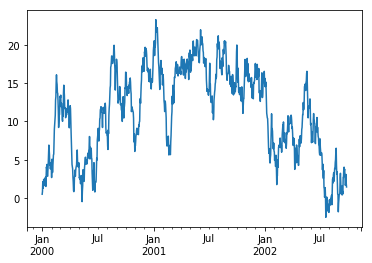

In [114]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [115]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 

<Figure size 432x288 with 0 Axes>

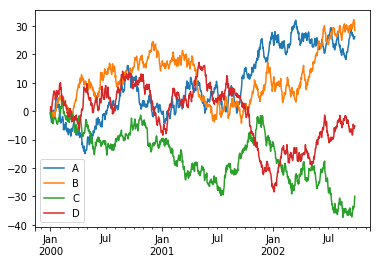

In [116]:
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## 导入导出数据

In [117]:
df.to_csv('foo.csv')

In [118]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.590051,-0.231487,-0.470312,0.300399
1,2000-01-02,-2.171069,-1.666426,-1.952569,1.639277
2,2000-01-03,-2.196826,-1.109775,-0.741960,0.620924
3,2000-01-04,-3.429228,0.110533,-1.291923,-0.153545
4,2000-01-05,-4.002333,-1.227831,-2.195246,0.531003
